In [3]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, verbose = verbose)
    
    return model

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [5]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)


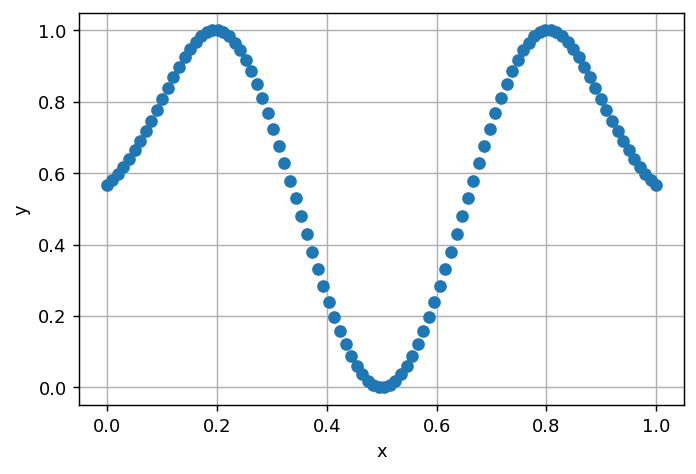

In [9]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
fig.savefig(image_path("1D_Gaussian.pdf"), bbox_inches='tight')
plt.show()

### Training Models

In [5]:
np.random.seed(42)

qcn_list = []
for i in range(1):
    qcn = sequential_qnn(n_qubits = [4],
                         dim = [2, 1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qnn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(1) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qnn"))

epoch: 0, loss: 0.18098806069135384
epoch: 1, loss: 0.13212039891203478
epoch: 2, loss: 0.10131274881126359
epoch: 3, loss: 0.08236043495540994
epoch: 4, loss: 0.06972596649140728
epoch: 5, loss: 0.06138025986658722
epoch: 6, loss: 0.05623589340456026
epoch: 7, loss: 0.05315110684817485


KeyboardInterrupt: 

In [ ]:
y_pred = qcn_list[0].predict(x_qcn)

In [ ]:
plt.plot(y_pred)

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots=0)
    
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_10000"))

## 2D function

### Generate Data

In [12]:
np.random.seed(42)

n = 12
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.2, 0.8]])
var1 = np.array([[0.01, 0], [0, 0.01]])

mean2 = np.array([[0.5, 0.8]])
var2 = np.array([[0.01, 0], [0, 0.01]])

mean3 = np.array([[0.8, 0.8]])
var3 = np.array([[0.01, 0], [0, 0.01]])

mean4 = np.array([[0.2, 0.5]])
var4 = np.array([[0.01, 0], [0, 0.01]])

mean5 = np.array([[0.5, 0.5]])
var5 = np.array([[0.01, 0], [0, 0.01]])

mean6 = np.array([[0.8, 0.5]])
var6 = np.array([[0.01, 0], [0, 0.01]])

mean7 = np.array([[0.2, 0.2]])
var7 = np.array([[0.01, 0], [0, 0.01]])

mean8 = np.array([[0.5, 0.2]])
var8 = np.array([[0.01, 0], [0, 0.01]])

mean9 = np.array([[0.8, 0.2]])
var9 = np.array([[0.01, 0], [0, 0.01]])


y = gaussian(x, mean1, var1) - gaussian(x, mean2, var2) + gaussian(x, mean3, var3) - gaussian(x, mean4, var4) +\
gaussian(x, mean5, var5) - gaussian(x, mean6, var6) + gaussian(x, mean7, var7) - gaussian(x, mean8, var8) +\
gaussian(x, mean9, var9)


x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

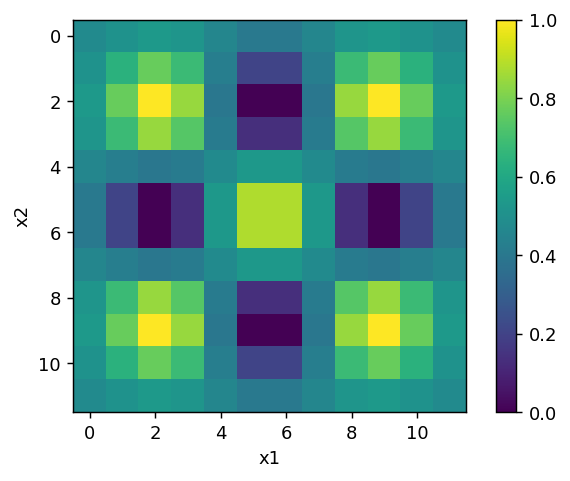

In [16]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.imshow(y.reshape(n,n))
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
fig.savefig(image_path("2D_Gaussian.pdf"), bbox_inches='tight')
plt.show()

### Training Models

In [14]:
np.random.seed(42)

qcn_list = []
for i in range(1):
    qcn = sequential_qnn(n_qubits = [4],
                         dim = [2, 1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(1) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qnn_2D"))

epoch: 0, loss: 0.056233988219201524
epoch: 1, loss: 0.045321373777451344
epoch: 2, loss: 0.042136327181134234
epoch: 3, loss: 0.04246165603716166
epoch: 4, loss: 0.04301864445469384
epoch: 5, loss: 0.04270398932808839
epoch: 6, loss: 0.0418535570948558
epoch: 7, loss: 0.040966478492097606
epoch: 8, loss: 0.04020866583435202
epoch: 9, loss: 0.03967148905654852
epoch: 10, loss: 0.03944563829044448
epoch: 11, loss: 0.03947830396095144
epoch: 12, loss: 0.03959906205950334
epoch: 13, loss: 0.039657916025856096
epoch: 14, loss: 0.039609114248971865
epoch: 15, loss: 0.03948098008047152
epoch: 16, loss: 0.03928969486575449
epoch: 17, loss: 0.039043309953883484
epoch: 18, loss: 0.03878812022728379
epoch: 19, loss: 0.038586253100794284
epoch: 20, loss: 0.03847569772642818
epoch: 21, loss: 0.03846058340191344
epoch: 22, loss: 0.038512616256318605
epoch: 23, loss: 0.03857219677022996
epoch: 24, loss: 0.03857487013765684
epoch: 25, loss: 0.038503250573668955
epoch: 26, loss: 0.038405108503378735
e

In [18]:
np.random.seed(42)

qcn_list = []
for i in range(1):
    qcn = sequential_qnn(n_qubits = [4],
                         dim = [2, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(1) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qnn_2D_qubit_encoding"))

epoch: 0, loss: 0.08324109421732902
epoch: 1, loss: 0.06057365428970485
epoch: 2, loss: 0.06050841583376146
epoch: 3, loss: 0.06179421553374055
epoch: 4, loss: 0.059048653003526436
epoch: 5, loss: 0.05706315973677271
epoch: 6, loss: 0.05664017417729499
epoch: 7, loss: 0.05672804939487978
epoch: 8, loss: 0.05676190156357238
epoch: 9, loss: 0.05675483113549519
epoch: 10, loss: 0.05662504020468252
epoch: 11, loss: 0.056193101498500604
epoch: 12, loss: 0.05550605100997176
epoch: 13, loss: 0.05483764749095706
epoch: 14, loss: 0.05442423723368985
epoch: 15, loss: 0.05428431721959949
epoch: 16, loss: 0.05427332519756693
epoch: 17, loss: 0.054231666457991774
epoch: 18, loss: 0.054079023823202656
epoch: 19, loss: 0.053846493428009484
epoch: 20, loss: 0.05364815457936461
epoch: 21, loss: 0.053589653502811065
epoch: 22, loss: 0.053667479328778356
epoch: 23, loss: 0.053762037654792386
epoch: 24, loss: 0.05375576237179277
epoch: 25, loss: 0.053645525575616804
epoch: 26, loss: 0.05352212047601203
ep

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qcn_list.append([qcn, x_qcn, y, False])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   

saver(qcn_list, data_path("trainability_qcn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
   
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_10000"))

## 3D function

### Generate Data

In [18]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(216, 1)


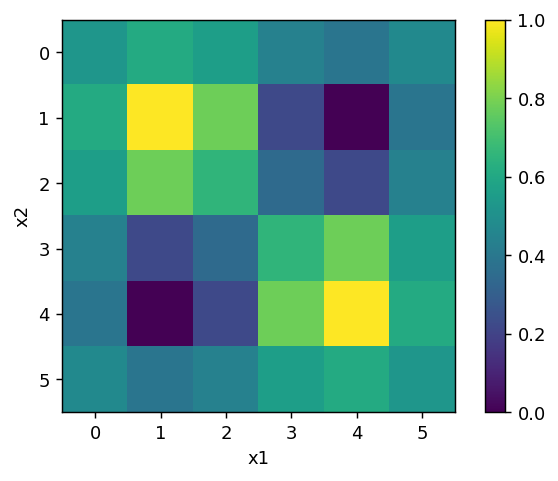

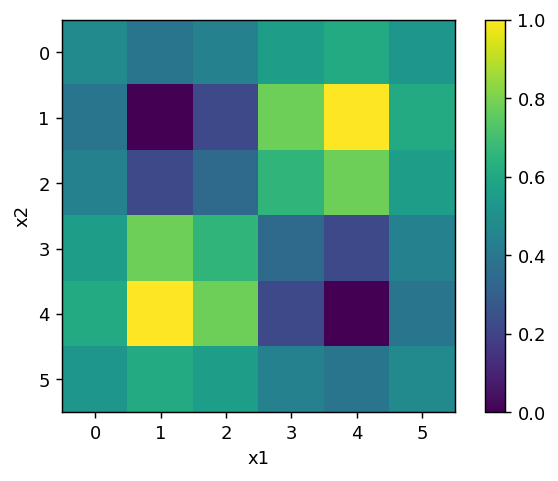

In [22]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.imshow(y.reshape(n,n,n)[1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
fig.savefig(image_path("3D_Gaussian_1.pdf"), bbox_inches='tight')
plt.show()

fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.imshow(y.reshape(n,n,n)[4])
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
fig.savefig(image_path("3D_Gaussian_2.pdf"), bbox_inches='tight')
plt.show()

In [21]:
np.random.seed(42)

qcn_list = []
for i in range(1):
    qcn = sequential_qnn(n_qubits = [5],
                         dim = [3, 1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(1) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qnn_3D_RZZEncoding"))

epoch: 0, loss: 0.032023025102001064
epoch: 1, loss: 0.027299537326144225
epoch: 2, loss: 0.024447947169682807
epoch: 3, loss: 0.02340646897000016
epoch: 4, loss: 0.023615816017375307
epoch: 5, loss: 0.023823484837331165
epoch: 6, loss: 0.0235820739815142
epoch: 7, loss: 0.02313233421781347
epoch: 8, loss: 0.02276764414764384
epoch: 9, loss: 0.022502223125771364
epoch: 10, loss: 0.022274628807442978
epoch: 11, loss: 0.022125759842811718
epoch: 12, loss: 0.02204592835286201
epoch: 13, loss: 0.021937384206612134
epoch: 14, loss: 0.021806253841659257
epoch: 15, loss: 0.021713202135351453
epoch: 16, loss: 0.02165411792827021
epoch: 17, loss: 0.021558919547293356


KeyboardInterrupt: 

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_10000"))

# Trainability, Noisy

In [ ]:
backend_santiago = pickle.load(open("backend_santiago", "rb"))

## 1D, Gaussian Data

### Generate data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

In [ ]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training models

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 8192)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1_noisy"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 8192)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2_noisy"))

In [ ]:
epoch: 0, loss: 0.15239299861811456
epoch: 1, loss: 0.08257248353374153
epoch: 2, loss: 0.08128709729381343
epoch: 3, loss: 0.06450038365689272
epoch: 4, loss: 0.044012149619208435
epoch: 5, loss: 0.032987418300738564
epoch: 6, loss: 0.03292349602115554